In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import random
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Afficher les GPU disponibles

In [2]:
# Vérifier si TensorFlow détecte la carte graphique
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


Charger les images

In [3]:
# Chargement des images à partir des répertoires 'train' et 'test'
train_dir = '../images/train'
test_dir = '../images/test'

In [4]:

# Charger les datasets d'images (en ajustant les paramètres pour la taille des images)
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Redimensionner les images
    batch_size=32,
    label_mode='binary',  # Pour une classification binaire (benin/malignant)
    color_mode='rgb',  # Les images en couleur
    seed=42
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary',
    color_mode='rgb',
    seed=42
)

Found 2637 files belonging to 2 classes.
Found 660 files belonging to 2 classes.


In [5]:

# Prétraitement des images : normalisation
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:

# Création du modèle
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    layers.Rescaling(1./255),  # Normalisation des pixels entre 0 et 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Classification binaire (benin/malignant)
])


c:\Users\Swerk\PycharmProjects\pythonProject1\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss pour classification binaire
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Précision sur le jeu de test : {test_acc:.4f}")

# Prédictions sur le jeu de test
y_pred = model.predict(test_dataset)
y_pred = (y_pred > 0.5).astype(int)  # Convertir en 0 ou 1

# Récupérer les labels réels
y_true = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())

# Calcul de l'accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy (accuracy_score) : {acc:.4f}")


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.6155 - loss: 0.8936 - val_accuracy: 0.6712 - val_loss: 0.6113
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.7421 - loss: 0.5046 - val_accuracy: 0.7879 - val_loss: 0.3977
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.7770 - loss: 0.4319 - val_accuracy: 0.7727 - val_loss: 0.4092
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.7910 - loss: 0.3847 - val_accuracy: 0.7985 - val_loss: 0.3664
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 210ms/step - accuracy: 0.8138 - loss: 0.3703 - val_accuracy: 0.8015 - val_loss: 0.3681
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 206ms/step - accuracy: 0.8199 - loss: 0.3444 - val_accuracy: 0.8091 - val_loss: 0.4040
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 206ms/step - accuracy: 0.8365 - loss: 0.3384 - val_accuracy: 0.8061 - val_loss: 0.3617
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.8473 - loss: 0.2959 - val_accu

Choisir une image aléatoire, afficher sa category et déterminer si c'est Benign ou Malignant

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


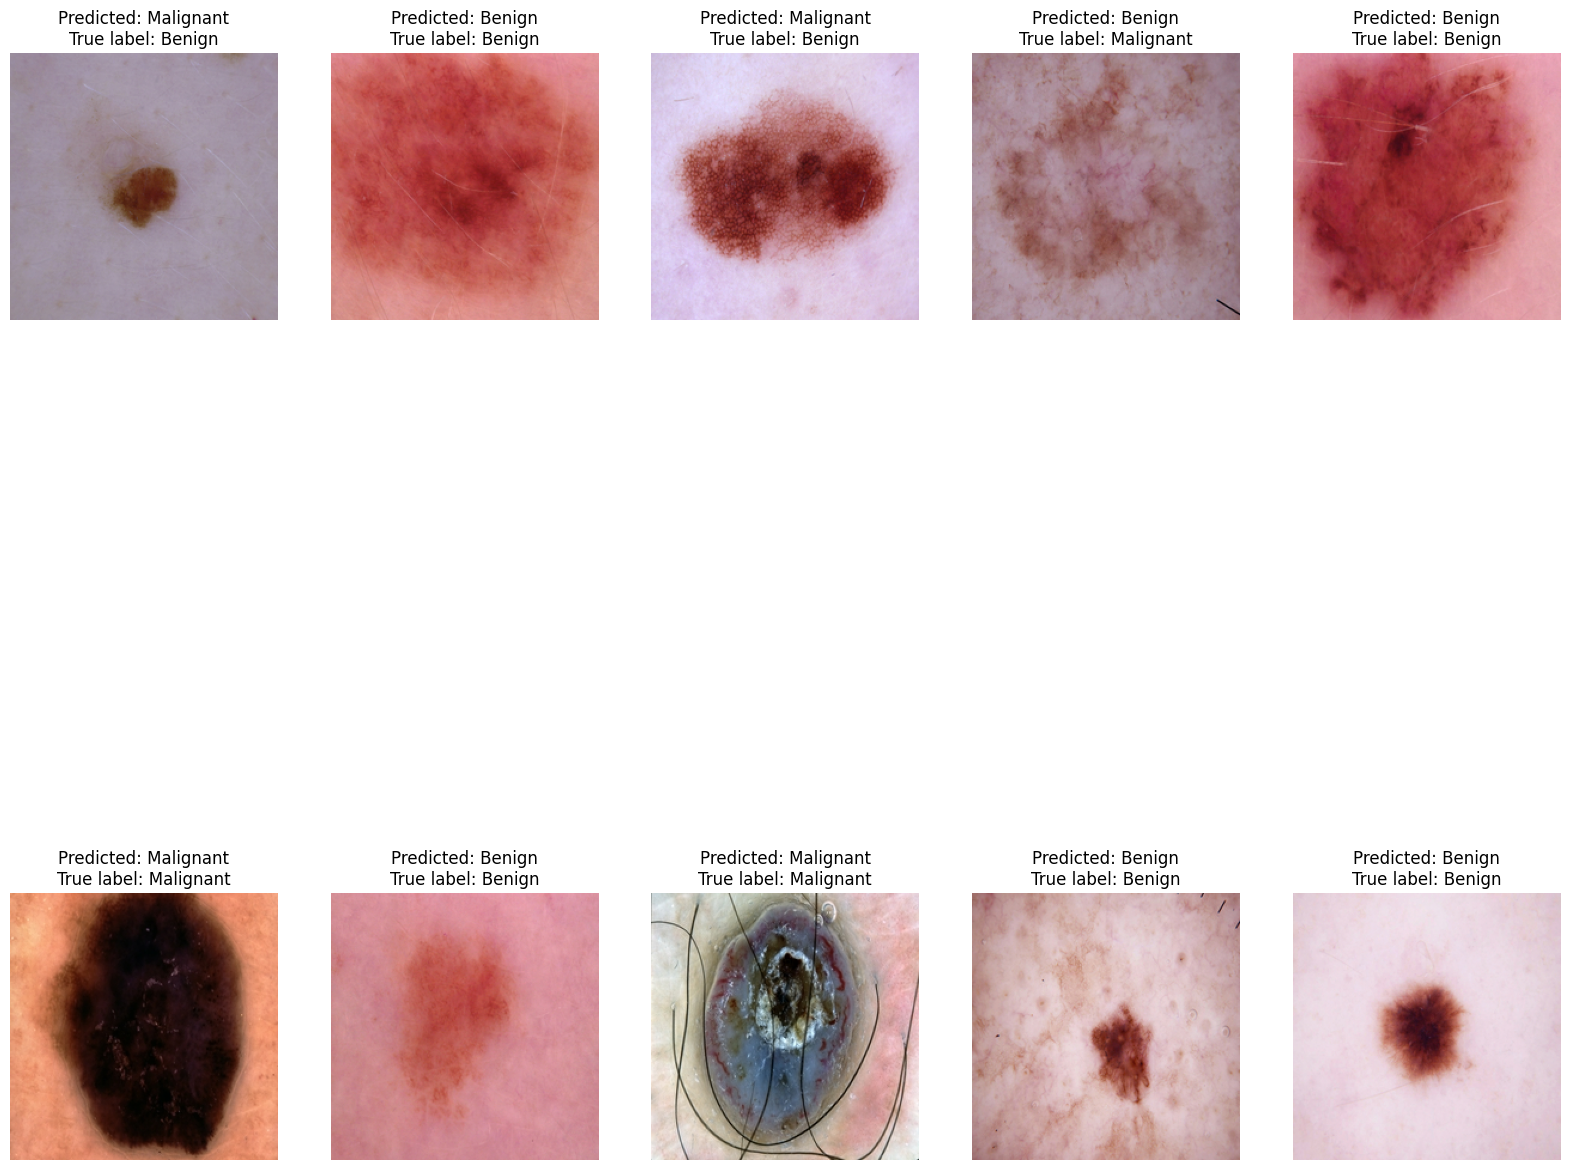

In [9]:
# Sélectionner 10 images aléatoires

test_images = list(test_dataset.as_numpy_iterator())

selected_images = random.sample(test_images, 10)

fig, axes = plt.subplots(2, 5, figsize=(20, 20))

for i, (img, label) in enumerate(selected_images):
    img = img[0]  # Récupérer l'image
    label = label[0]  # Récupérer le label

    # Prédire le label de l'image
    pred = model.predict(img.reshape(1, 224, 224, 3))
    pred = (pred > 0.5).astype(int)

    # Afficher l'image (rescale to [0, 1] for display)
    ax = axes[i // 5, i % 5]
    ax.imshow(img / 255.0)
    prediction = 'Malignant' if pred[0][0] == 1 else 'Benign'
    truelabel = 'Malignant' if label == 1 else 'Benign'
    ax.set_title(f"Predicted: {prediction}\nTrue label: {truelabel}")
    ax.axis('off')

# Sauvegarder le model en format tensorflow_sequential_skincancer.keras
model.save('../saved_models/tensorflow_sequential_skincancer.keras')

